# Global Power Plant Database
Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Global Power Plant Database
Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
-  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
- Fuel Type Aggregation
- We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [253]:
#Loading the dataset
df = pd.read_csv("database_IND.csv")
print("Successfully Imported Data!")
df

Successfully Imported Data!


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [255]:
df.tail(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Starting the EDA

In [256]:
# Checking Configuration of Dataset
df.shape

(907, 27)

- In dataset contains 907 rows and 27 columns
- There are 27 columns of which 26 are features, and the 2 lables are Primary_Fuel(For Classification Model), and Capacity_mw(For Regression Model)

In [257]:
# Checking data types
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

- In the dataset, Categarical and Numerical data is present

In [258]:
# Checking for null values if any
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Text(0.5, 1.0, 'NULL VALUES')

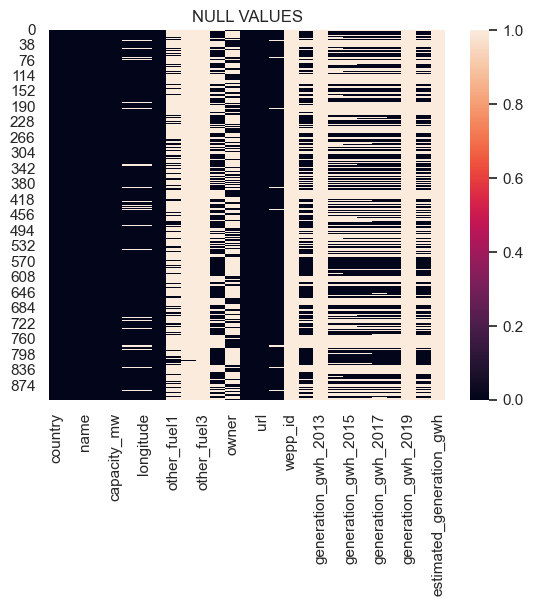

In [259]:
sns.heatmap(df.isnull())
plt.title("NULL VALUES")

- We can see the columns contain large number of null values.

- We Will deleting the columns: 'other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh' as all of these columns have no data in them(except for 'other_fuel2' that has just 1 entry)

- We will also delete the columns: 'country','country_long','other_fuel1','owner','url','generation_data_source' as either they have insufficient data or are not useful for Model Prediction at all

In [260]:
# droping irrevant column

df.drop("country",axis=1,inplace=True) 
df.drop("country_long",axis=1,inplace=True)
df.drop("name",axis=1,inplace=True)
df.drop("gppd_idnr",axis=1,inplace=True)
df.drop("url",axis=1,inplace=True)
df.drop("other_fuel1",axis=1,inplace=True)
df.drop("other_fuel2",axis=1,inplace=True)
df.drop("other_fuel3",axis=1,inplace=True)
df.drop("wepp_id",axis=1,inplace=True)
df.drop("generation_gwh_2013",axis=1,inplace=True)
df.drop("generation_gwh_2019",axis=1,inplace=True)
df.drop("estimated_generation_gwh",axis=1,inplace=True)

In [261]:
df.drop("owner",axis=1,inplace=True)

In [262]:
df.drop("generation_data_source",axis=1,inplace=True)

In [263]:
 df.drop("year_of_capacity_data",axis=1,inplace=True)

In [264]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [265]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

- As we can see lots of null values present in the cloumns, we will treat it by Mean or Mode methods.

## Filling null values with mean or medium for numerical data and mode for categorical data

In [266]:
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["longitude"] = df["longitude"].fillna(df["longitude"].mean())
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())

Text(0.5, 1.0, 'NULL VALUES')

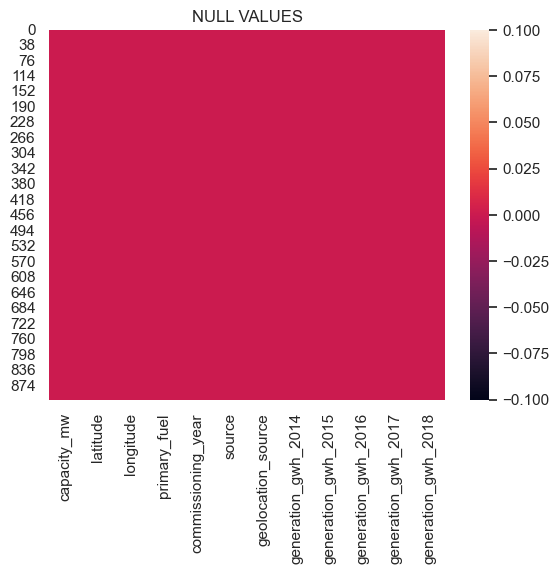

In [267]:
sns.heatmap(df.isnull())
plt.title("NULL VALUES")

- Now, As we can see no null values are present in dataset.

In [268]:
# checking for white space
# Iterate through each column of the dataframe and check for white spaces
for col in df.columns:
    # Count the number of white spaces in the column
    num_spaces = sum(df[col].astype(str).apply(lambda x: x.isspace()))

    # Display the results
    print(f"Column '{col}' has {num_spaces} white spaces.")

Column 'capacity_mw' has 0 white spaces.
Column 'latitude' has 0 white spaces.
Column 'longitude' has 0 white spaces.
Column 'primary_fuel' has 0 white spaces.
Column 'commissioning_year' has 0 white spaces.
Column 'source' has 0 white spaces.
Column 'geolocation_source' has 0 white spaces.
Column 'generation_gwh_2014' has 0 white spaces.
Column 'generation_gwh_2015' has 0 white spaces.
Column 'generation_gwh_2016' has 0 white spaces.
Column 'generation_gwh_2017' has 0 white spaces.
Column 'generation_gwh_2018' has 0 white spaces.


- As we can see no white spaces are present in the dataset

## Splitting the dataset in numerical and categorical dataset

In [269]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'source', 'geolocation_source']


In [270]:
# checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [271]:
#Check for duplicate data
df.duplicated().sum()

1

- As we can see 1 duplicate record is found, We will found duplicate record and delete.

In [272]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
674,22.5,21.197918,77.464907,Wind,2001.0,CDM,WRI,801.123775,711.181225,737.20545,817.97725,817.97725


In [273]:
df.drop_duplicates(keep='first', inplace=True)

In [274]:
#Check for duplicate data again
df.duplicated().sum()

0

- Now no duplicate data is present in dataset

# Description of dataset


In [275]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,326.558991,21.197918,77.464907,1998.726269,1517.479764,1510.953073,1566.275463,1658.048005,1658.048005
std,590.324956,6.082506,4.814949,13.165673,2787.041277,2986.525073,3006.620856,3048.418036,3048.418036
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.612500,17.065350,74.387550,1998.000000,801.123775,711.181225,737.205450,817.977250,817.977250
50%,59.600000,21.292250,76.978950,2001.000000,801.123775,711.181225,737.205450,817.977250,817.977250
75%,386.625000,25.178075,79.207350,2003.000000,801.123775,711.181225,737.205450,817.977250,817.977250
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35116.000000


<AxesSubplot:>

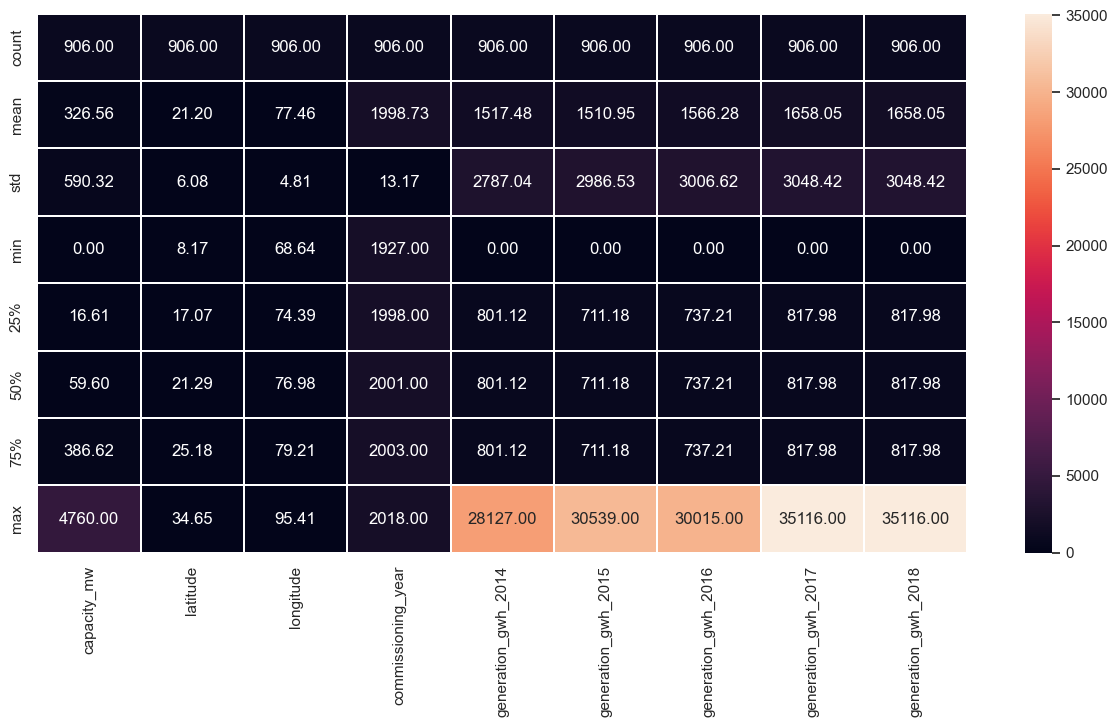

In [276]:
# Visualizing the description of the columns using heatmap.
plt.figure(figsize=(15,7))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.2f',annot = True)

### Observations-
- count is same for all columns.
- In some columns, where mean > median, Left skewness is present
- In some columns, where mean < median, Right skewness is present
- The max of all the columns is exceptionally high than median, and thus we can say outliers are present in some of the columns

# Data Visualization

## Univariate Analysis

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

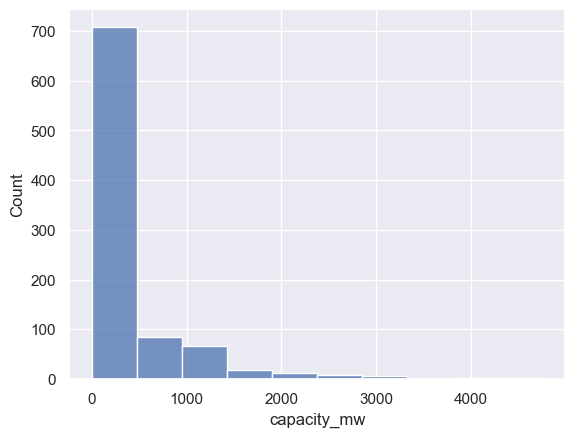

In [277]:
# Histogram to check capacities of various power plants
sns.histplot(data=df['capacity_mw'],bins=10)

- We can see nearly 700 power plants generate capacity in range of 0-500 mw, a roughly 100 power plants generate capacity in range 500-100 mw and there are very few that produce capacity greater than 2000 and 4000.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

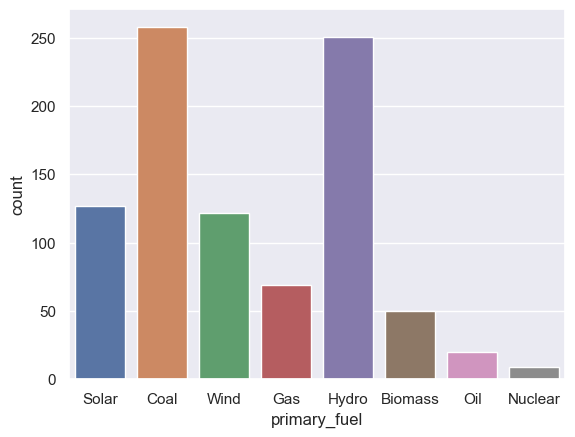

In [278]:
plt.xlabel('primary_fuel')
plt.ylabel('Count')
sns.countplot(df["primary_fuel"])

- Coal and Hydro is used mostly use as primary fuel than Solar,Wind,Gas,Biomass,Oil, Nuclear.

WRI                                     783
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


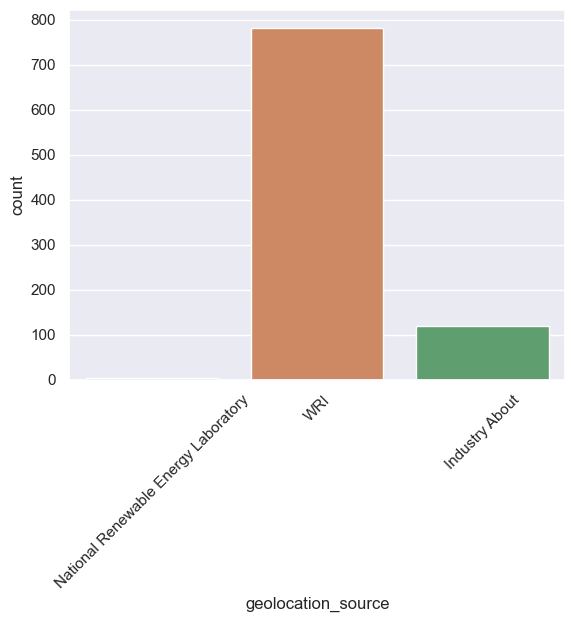

In [279]:
# Count plot to check individual value counts of geolocation_source
print(df['geolocation_source'].value_counts())
sns.countplot(df['geolocation_source'])
plt.xticks(rotation=45)
plt.show()

- We can see the Geo-location source selected for most of the power plants is 'WRI', followed by 'Insustry About' and a very few of them have the source as 'National Renewable Energy Laboratory'

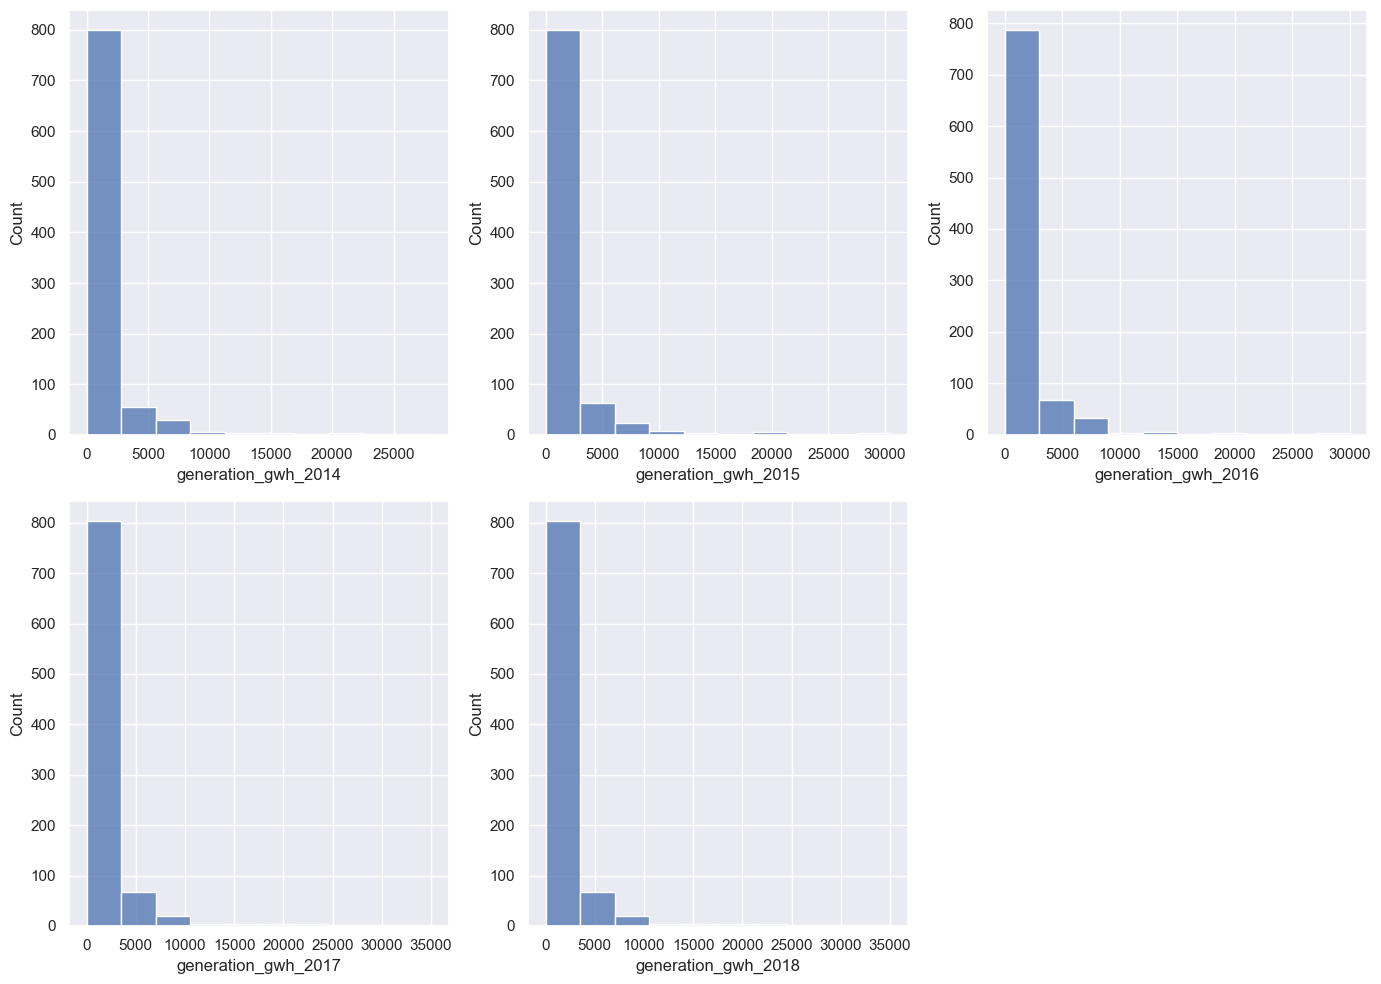

In [280]:
# Histogram to check electricity generation units in years 2014-2018
plt.figure(figsize=(14,10),facecolor='white')
plotnum=1
gcols=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for col in gcols:
    if plotnum<=6:
        plt.subplot(2,3,plotnum)
        sns.histplot(data=df[col],bins=10)
    plotnum+=1
plt.tight_layout()

- We can see, generating electricity in range of 2500 gwh is seen in all years by around 800 power plants.

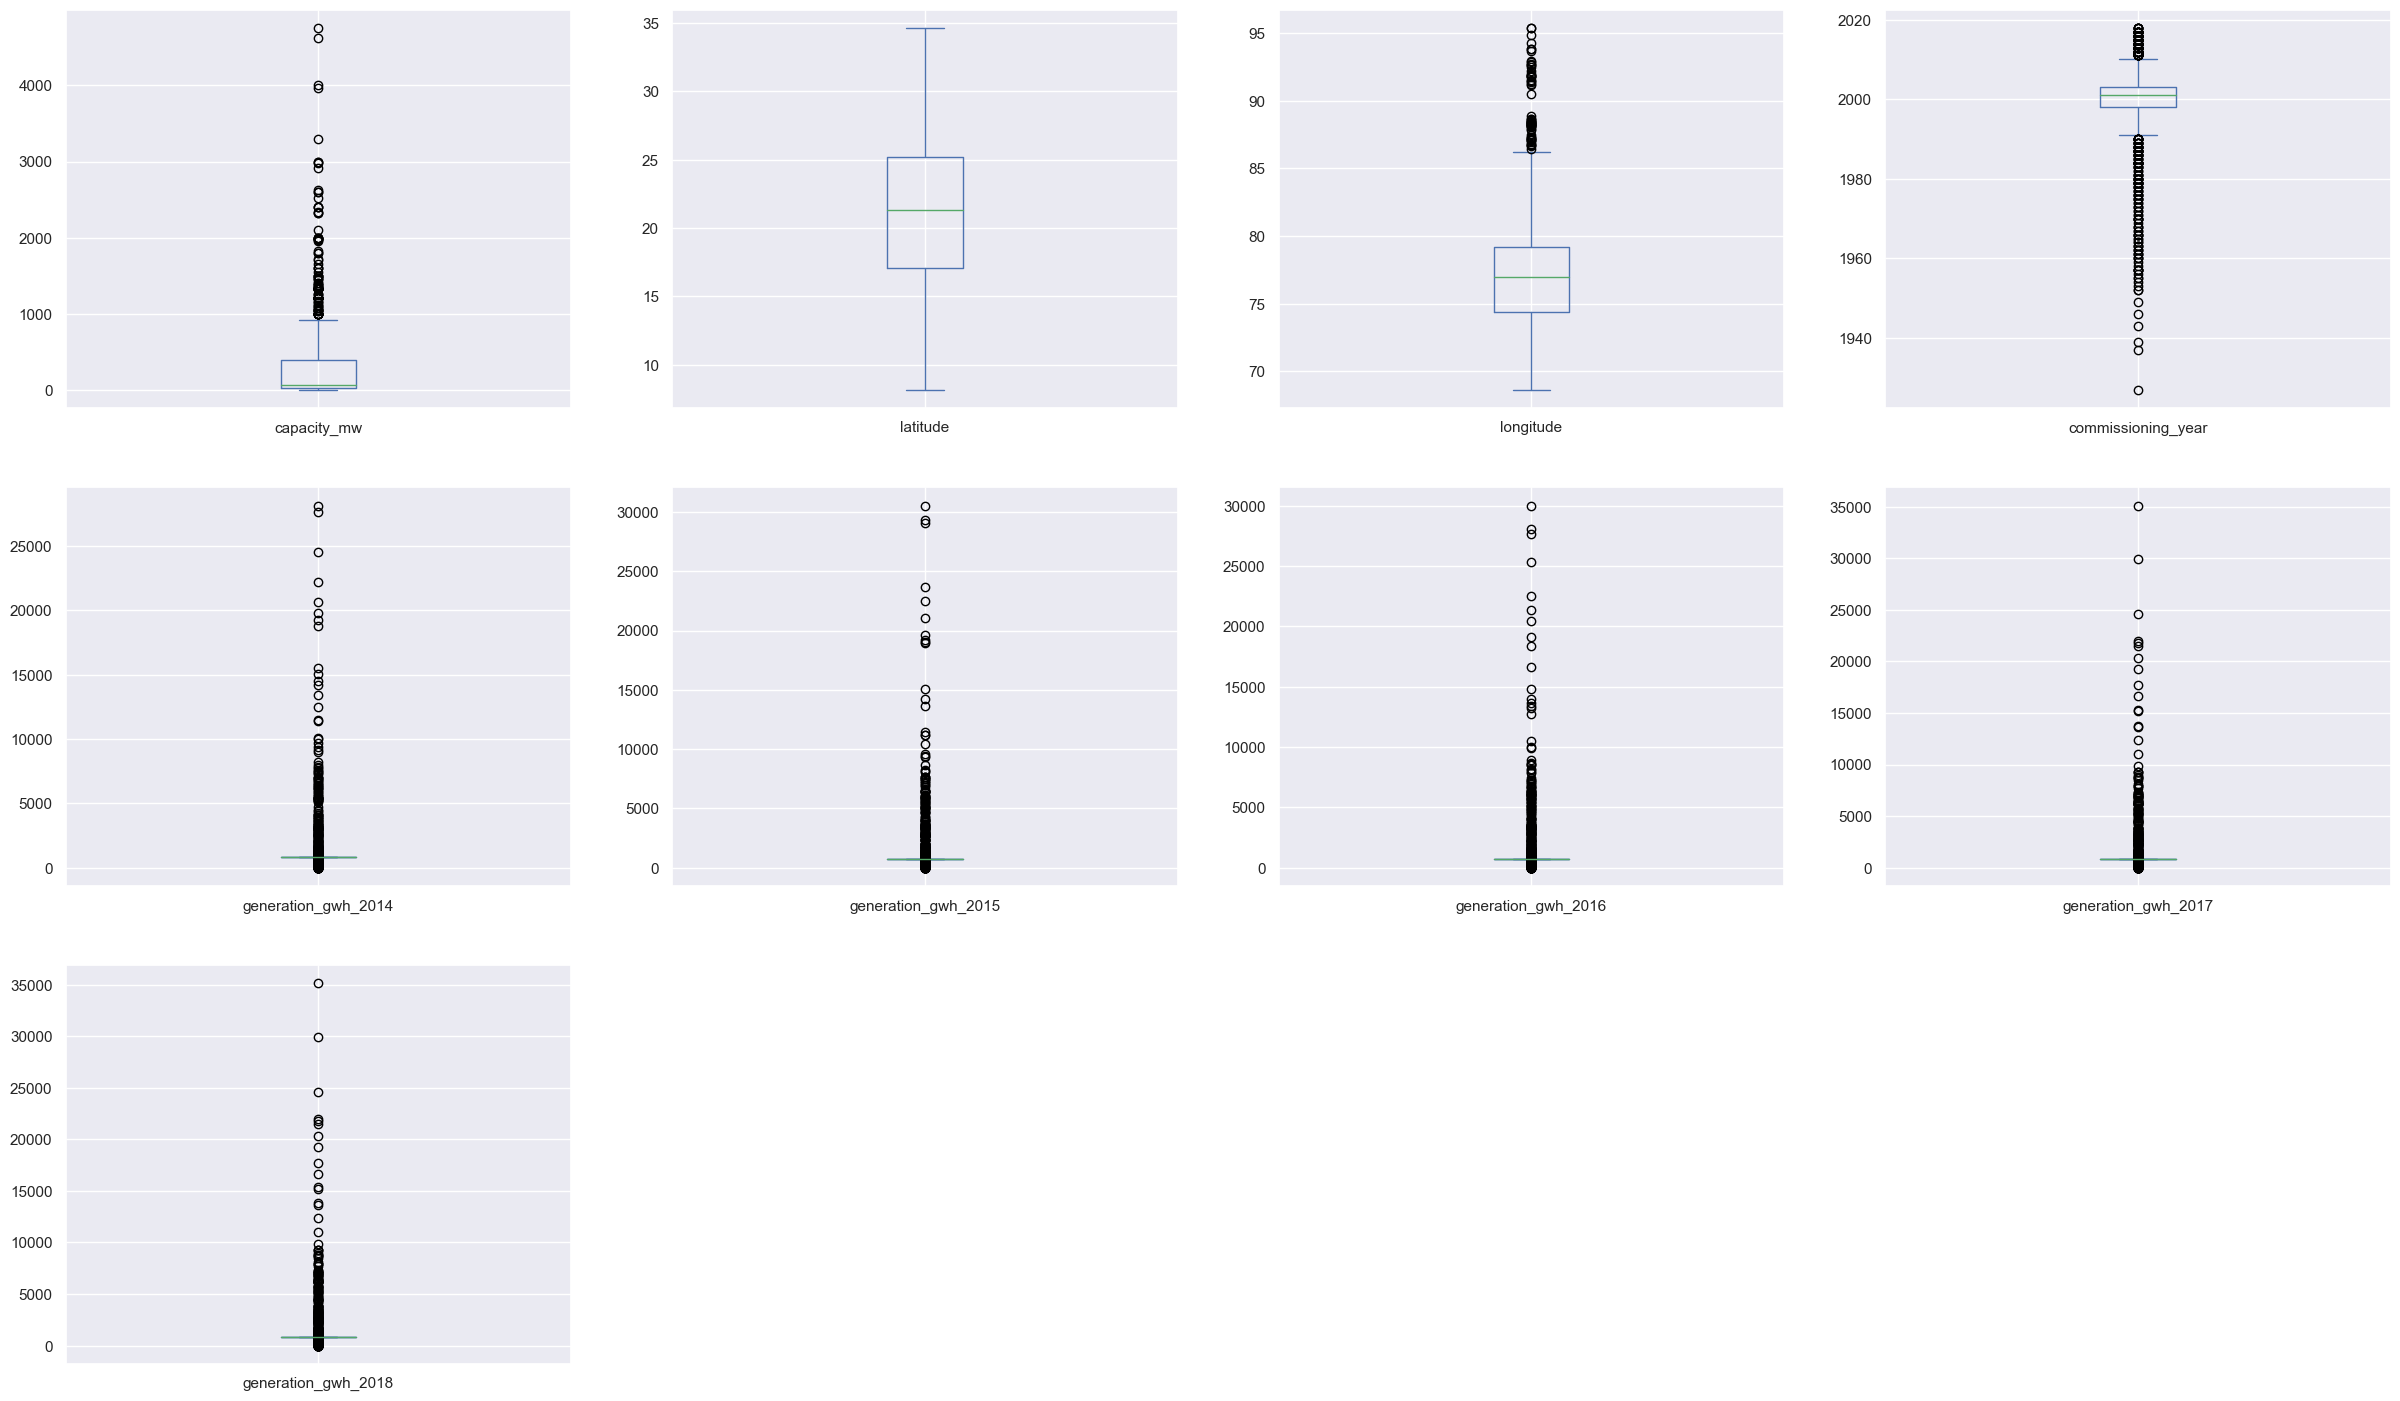

In [281]:
# Now visualize the data using boxplot for getting more idea abot outliers


df[numerical_col].plot(kind='box',subplots=True,layout=(5,4),figsize=(30,30))
plt.show()

- As we can see outliers are present in most of the columns

# Bivariate and Multivariate Visualization

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

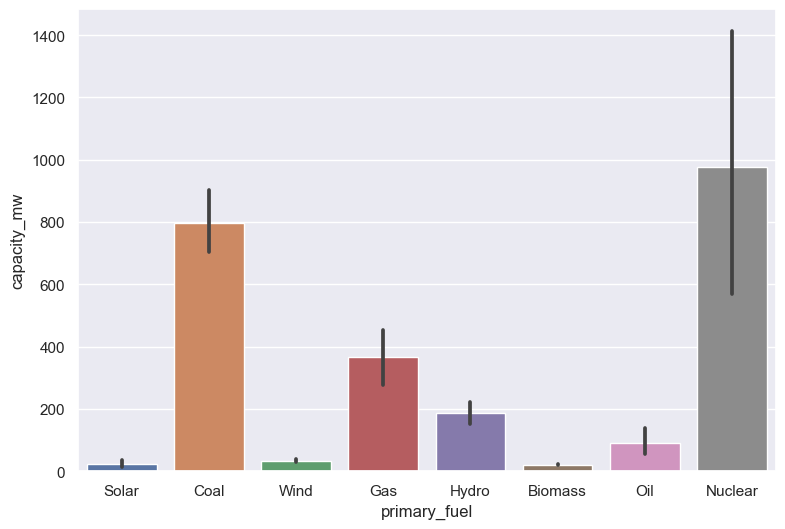

In [282]:
# Bar plot to check capacity_mw generated by different primary_fuels
plt.figure(figsize=(9,6))
sns.barplot(x="primary_fuel", data=df,y='capacity_mw')

- As we can see Nuclear is mostly used primary fue for max capacity in mw generated by power plants, next used primary fuel is Coal followed by Gas,Hydro,Oil

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

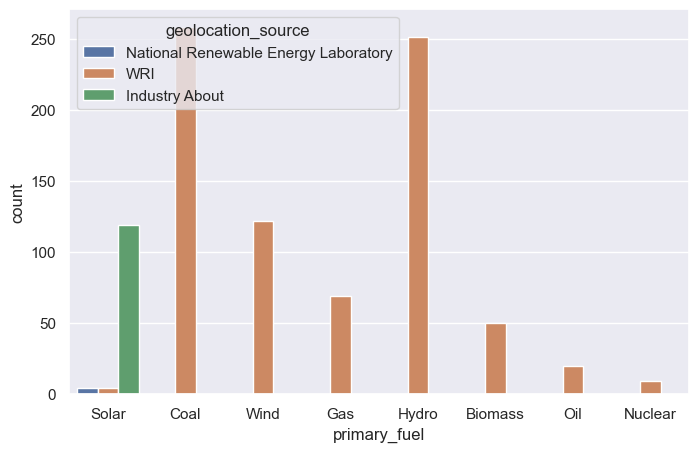

In [283]:
# Count plot to check in which geolocation source, what primary fuel is used
plt.figure(figsize=(8,5))
sns.countplot(x="primary_fuel", data=df,hue='geolocation_source')

- As we can see, primary fuel mostly use 'WRI' as their geolaocation

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

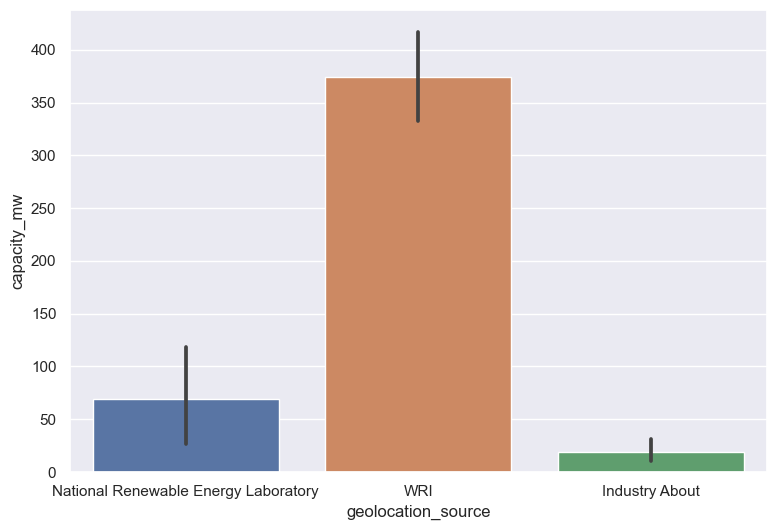

In [284]:
# Bar plot to check comparision between geolocation_source and capacity_mw
plt.figure(figsize=(9,6))
sns.barplot(x="geolocation_source", data=df,y='capacity_mw')

- As we can see WRI has high capacity 

<AxesSubplot:title={'center':'Comparision between commissioning_year and capacity_mw'}, xlabel='commissioning_year', ylabel='capacity_mw'>

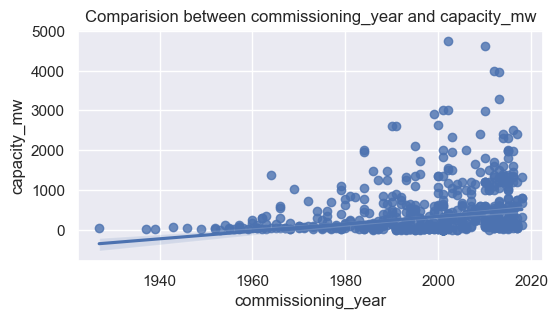

In [285]:
#Checking the relation between commissioning_year and capacity_mw
plt.figure(figsize=[6,3])
plt.title('Comparision between commissioning_year and capacity_mw')
sns.regplot(df['commissioning_year'],df["capacity_mw"])

- As we can see Capacity is increasing year by year

<AxesSubplot:title={'center':'Comparision between generation_gwh_2014 and capacity_mw'}, xlabel='generation_gwh_2014', ylabel='capacity_mw'>

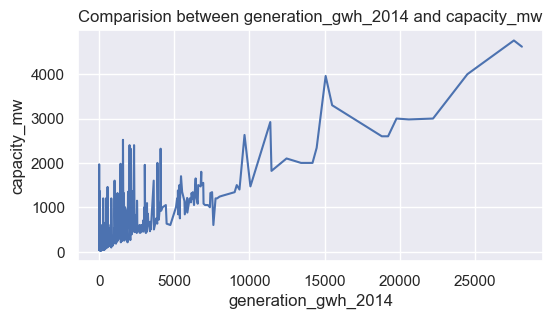

In [286]:
#Checking the relation between generation_gwh_2014 and capacity_mw
plt.figure(figsize=[6,3])
plt.title('Comparision between generation_gwh_2014 and capacity_mw')
sns.lineplot(df['generation_gwh_2014'],df["capacity_mw"])

<AxesSubplot:title={'center':'Comparision between generation_gwh_2015 and capacity_mw'}, xlabel='generation_gwh_2015', ylabel='capacity_mw'>

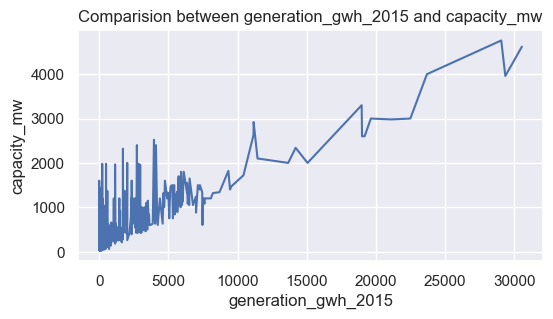

In [287]:
#Checking the relation between generation_gwh_2015 and capacity_mw
plt.figure(figsize=[6,3])
plt.title('Comparision between generation_gwh_2015 and capacity_mw')
sns.lineplot(df['generation_gwh_2015'],df["capacity_mw"])

<AxesSubplot:title={'center':'Comparision between generation_gwh_2016 and capacity_mw'}, xlabel='generation_gwh_2016', ylabel='capacity_mw'>

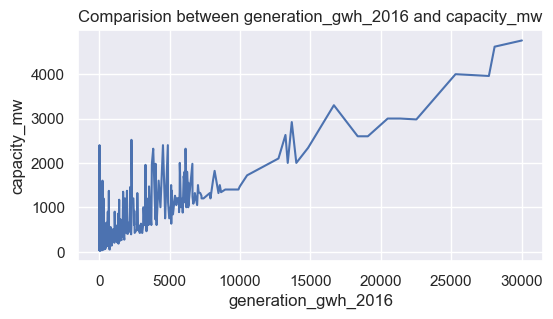

In [288]:
#Checking the relation between generation_gwh_2016 and capacity_mw
plt.figure(figsize=[6,3])
plt.title('Comparision between generation_gwh_2016 and capacity_mw')
sns.lineplot(df['generation_gwh_2016'],df["capacity_mw"])

<AxesSubplot:title={'center':'Comparision between generation_gwh_2017 and capacity_mw'}, xlabel='generation_gwh_2017', ylabel='capacity_mw'>

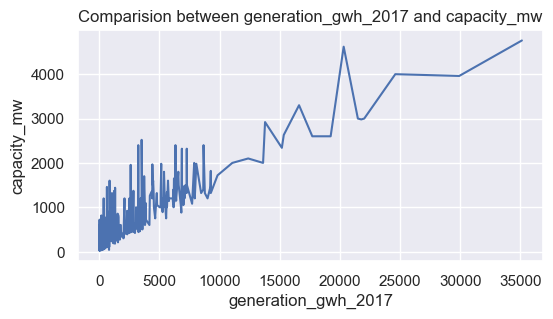

In [289]:
#Checking the relation between generation_gwh_2017 and capacity_mw
plt.figure(figsize=[6,3])
plt.title('Comparision between generation_gwh_2017 and capacity_mw')
sns.lineplot(df['generation_gwh_2017'],df["capacity_mw"])

<AxesSubplot:title={'center':'Comparision between generation_gwh_2018 and capacity_mw'}, xlabel='generation_gwh_2018', ylabel='capacity_mw'>

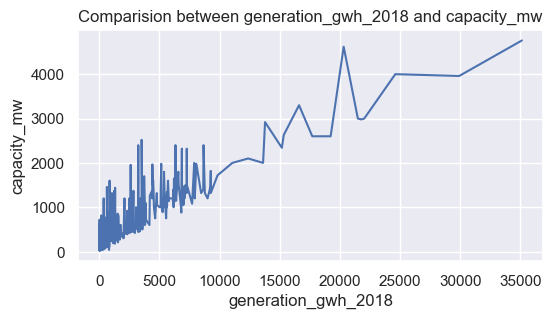

In [290]:
#Checking the relation between generation_gwh_2018 and capacity_mw
plt.figure(figsize=[6,3])
plt.title('Comparision between generation_gwh_2018 and capacity_mw')
sns.lineplot(df['generation_gwh_2018'],df["capacity_mw"])

- As we can see capacity increases as generation change also

## Encoding Categorical Data

In [291]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['source']=le.fit_transform(df['source'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,817.977250
1,98.0,24.7663,74.6090,1,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,817.977250
2,39.2,21.9038,69.3732,7,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,817.977250
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,5385.579736


# Checking Correlation

In [292]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050992,0.195911,-0.380086,0.211175,-0.242483,0.205137,0.793496,0.819677,0.853012,0.868345,0.868345
latitude,0.050992,1.000000,0.036362,-0.010220,0.087939,0.055935,-0.184291,0.058596,0.053871,0.047679,0.057899,0.057899
longitude,0.195911,0.036362,1.000000,-0.348481,0.029893,-0.239368,0.252364,0.104653,0.121517,0.143465,0.151719,0.151719
primary_fuel,-0.380086,-0.010220,-0.348481,1.000000,-0.055288,0.054645,-0.484724,-0.240561,-0.249203,-0.259609,-0.263507,-0.263507
commissioning_year,0.211175,0.087939,0.029893,-0.055288,1.000000,0.100861,-0.073990,0.077024,0.108809,0.141025,0.153615,0.153615
source,-0.242483,0.055935,-0.239368,0.054645,0.100861,1.000000,-0.505614,-0.126022,-0.131299,-0.135199,-0.135115,-0.135115
geolocation_source,0.205137,-0.184291,0.252364,-0.484724,-0.073990,-0.505614,1.000000,0.101453,0.105701,0.108841,0.108773,0.108773
generation_gwh_2014,0.793496,0.058596,0.104653,-0.240561,0.077024,-0.126022,0.101453,1.000000,0.963717,0.935062,0.904068,0.904068
generation_gwh_2015,0.819677,0.053871,0.121517,-0.249203,0.108809,-0.131299,0.105701,0.963717,1.000000,0.973229,0.940225,0.940225
generation_gwh_2016,0.853012,0.047679,0.143465,-0.259609,0.141025,-0.135199,0.108841,0.935062,0.973229,1.000000,0.973907,0.973907


<AxesSubplot:>

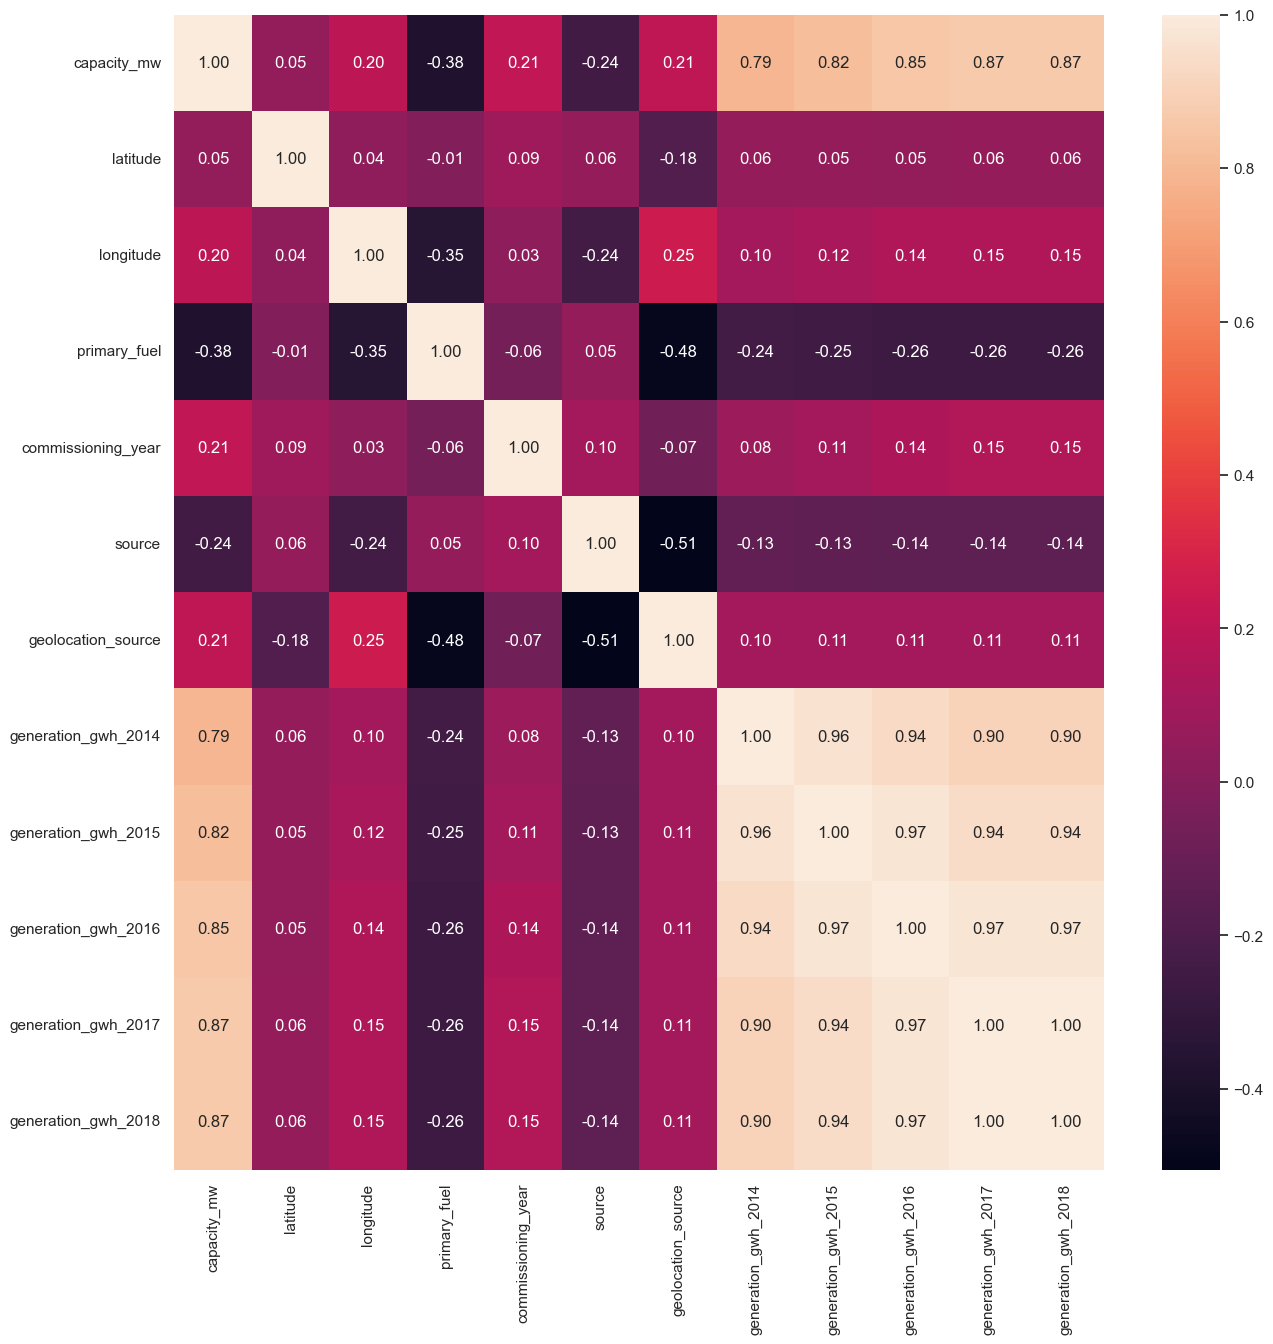

In [293]:
# Correlation using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

## Correlation of features with Target Column 1(primary_fuel)

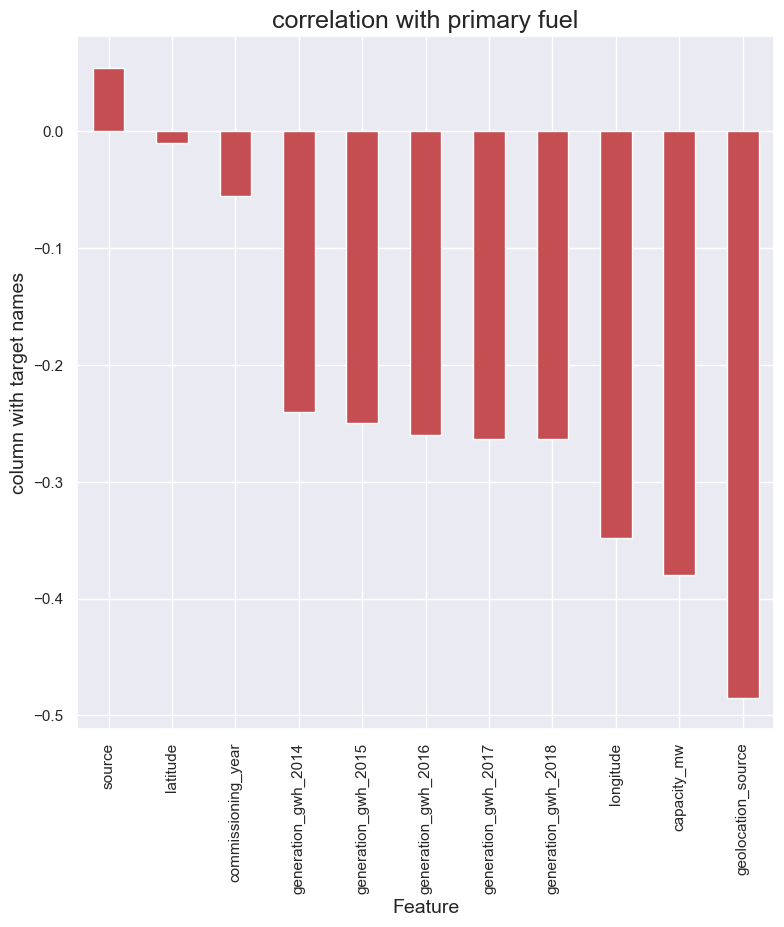

In [294]:
plt.figure(figsize=(9,9))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation with primary fuel',fontsize=18)
plt.show()

- As we can see that except 'source' column, all other features are negatively correlated with 'Primary_fuel'

## Correlation of features with Target Column 2(capacity_mw)

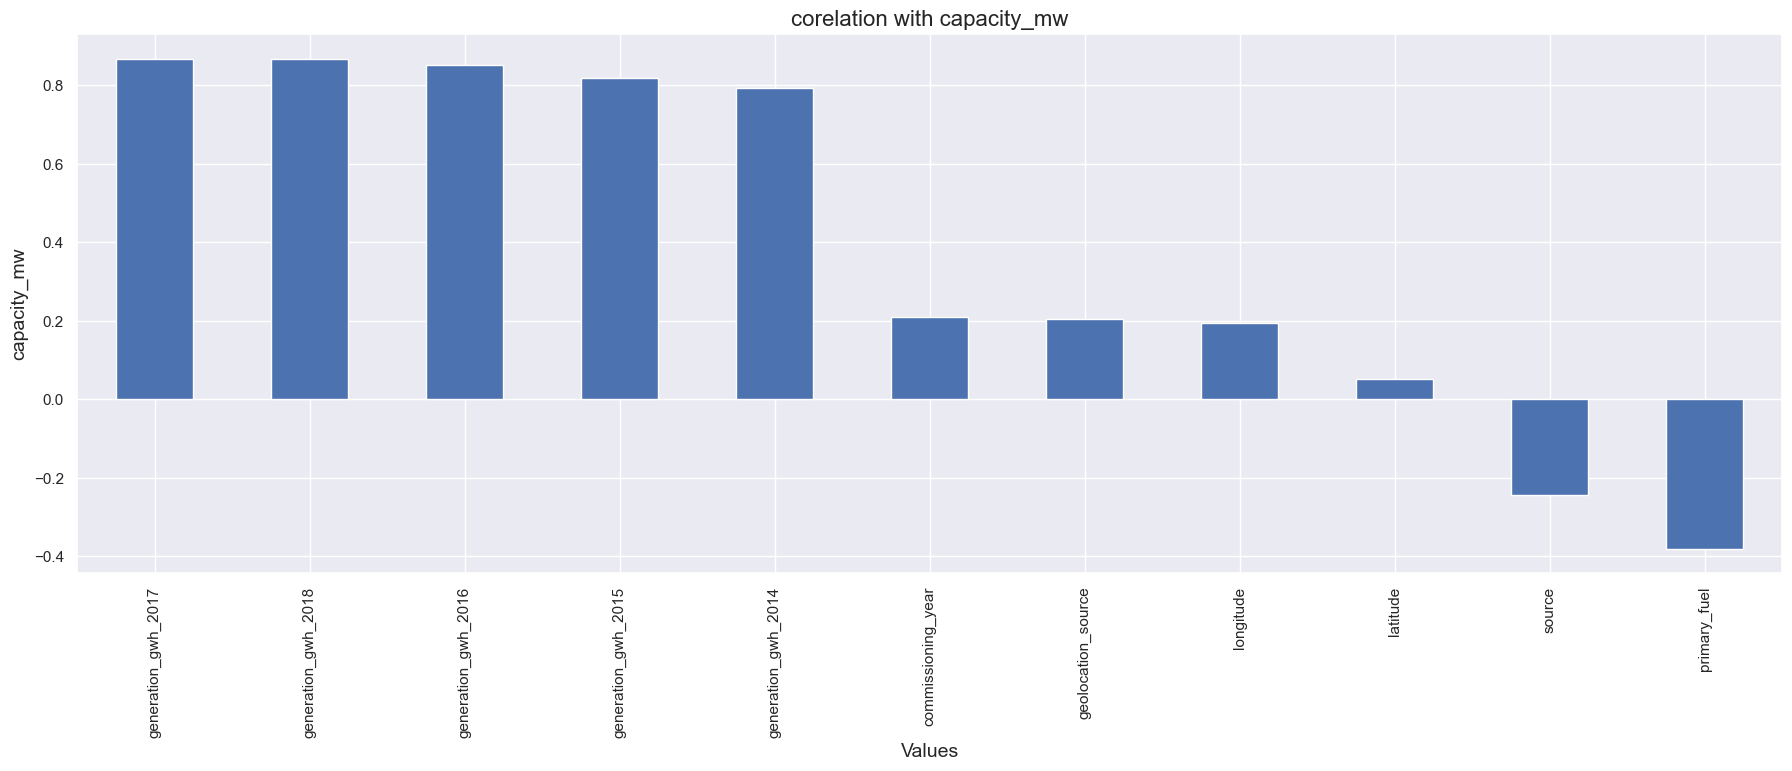

In [295]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar')
plt.xlabel('Values',fontsize=14)
plt.ylabel('capacity_mw',fontsize=14)
plt.title('corelation with capacity_mw',fontsize=16)
plt.show()

- As we can see that except 'source' and primary_fuel column, all other features are positively correlated with 'Capacity'

# Detecting Outliers and Treating them

### Method 1: Z-Score

In [296]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 219, 222,
       244, 299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342,
       345, 360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427,
       444, 454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494,
       494, 494, 494, 494, 499, 519, 532, 538, 541, 546, 573, 577, 583,
       592, 601, 621, 623, 638, 648, 648, 648, 648, 648, 648, 657, 657,
       657, 657, 657, 657, 661, 669, 688, 694, 694, 694, 694, 694, 694,
       705, 708, 720, 720, 720, 720, 720, 723, 723, 723, 723, 723, 725,
       725, 725, 725, 725, 725, 727, 766, 785, 785, 785, 785, 785, 785,
       787, 806, 807, 807, 807, 807, 807, 807, 817, 831, 847, 869, 870,
       878, 879, 879, 879, 879, 879, 879, 894, 899], dtype=int64), array([ 0,  8,  9, 10, 11,  5,  5,  0,  7,  8,  9, 10, 11,  0,  7,  2,  2,
        5,  0,  7,  8,  9, 10, 11,  4,  4,  2,  5,  0,  7,  8,  9

In [297]:
print("df.shape:",df.shape, "\ndf_new.shape:",df_new.shape)

df.shape: (906, 12) 
df_new.shape: (831, 12)


In [298]:
a = df.shape[0]
b = df_new.shape[0]
print('Data Loss Percentage - ',((a-b)/a)*100)

Data Loss Percentage -  8.27814569536424


- It is affordable loss of data now we will check with IQR method

### Method 2 - IQR Method

In [299]:
# 1st Quantile
Q1 = df.quantile(0.25)

# 3rd Quantile
Q3 = df.quantile(0.75)

In [300]:
# IQR
IQR = Q3 - Q1
IQR

df2 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(185, 12)

In [301]:
print('Data Loss Percentage - ',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage -  79.58057395143487


- 79% is removed using IQR method

- so we are using z-score method

In [302]:
# Now we proceed with new dataset
df=df_new
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,817.977250
1,98.0,24.7663,74.6090,1,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,817.977250
2,39.2,21.9038,69.3732,7,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,817.977250
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,801.123775,0.994875,233.596650,865.400000,865.400000
903,3.0,12.8932,78.1654,6,2001.0,77,0,801.123775,711.181225,737.205450,817.977250,817.977250
904,25.5,15.2758,75.5811,7,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,817.977250
905,80.0,24.3500,73.7477,1,2001.0,59,2,801.123775,711.181225,737.205450,817.977250,817.977250


In [303]:
#Checking Skewness
df.skew()

capacity_mw            1.965448
latitude              -0.122002
longitude              0.927622
primary_fuel           0.410772
commissioning_year    -1.263744
source                 1.778833
geolocation_source    -2.098153
generation_gwh_2014    2.925713
generation_gwh_2015    2.726470
generation_gwh_2016    2.665730
generation_gwh_2017    2.565305
generation_gwh_2018    2.565305
dtype: float64

-  We can see except for column 'latitude', skewness is present in all the columns.
- Remove skewnees using cube root method

In [304]:
df['capacity_mw']=np.cbrt(df['capacity_mw'])
df['commissioning_year']=np.cbrt(df['commissioning_year'])
df['source']=np.cbrt(df['source'])
df['geolocation_source']=np.cbrt(df['geolocation_source'])
df['generation_gwh_2014']=np.cbrt(df['generation_gwh_2014'])
df['generation_gwh_2015']=np.cbrt(df['generation_gwh_2015'])
df['generation_gwh_2016']=np.cbrt(df['generation_gwh_2016'])
df['generation_gwh_2017']=np.cbrt(df['generation_gwh_2017'])
df['generation_gwh_2018']=np.cbrt(df['generation_gwh_2018'])



In [305]:
df.skew()

capacity_mw            0.812906
latitude              -0.122002
longitude              0.927622
primary_fuel           0.410772
commissioning_year    -1.278087
source                 1.262167
geolocation_source    -2.121273
generation_gwh_2014    0.307931
generation_gwh_2015    0.441406
generation_gwh_2016    0.418205
generation_gwh_2017    0.279997
generation_gwh_2018    0.279997
dtype: float64

- As we can see now skewness is removed

# Approach 1: 'Classification Model to find "fuel_type

In [306]:
#Seperating Input and Target variables


x=df.drop('primary_fuel', axis=1)
y=df['primary_fuel']

In [307]:
x.shape

(831, 11)

In [308]:
y.shape

(831,)

# Data Scaling

In [309]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.173039,1.157106,-0.884596,1.008609,1.699913,-0.202309,-0.047932,-0.071069,-0.070834,-0.045236,-0.045236
1,-0.089872,0.598481,-0.569695,0.121737,2.589511,0.399723,-0.047932,-0.071069,-0.070834,-0.045236,-0.045236
2,-0.493888,0.130590,-1.774661,0.121737,-0.527555,0.399723,-0.047932,-0.071069,-0.070834,-0.045236,-0.045236
3,0.083094,0.452172,3.285421,0.388108,-0.479963,0.399723,-0.265160,0.069304,0.078803,-0.206411,-0.206411
4,2.425233,0.139825,1.225417,1.362535,-0.479963,0.399723,1.415491,2.386005,2.387439,2.049696,2.049696
...,...,...,...,...,...,...,...,...,...,...,...
826,2.269301,-0.786216,0.062682,1.450943,-0.479963,0.399723,-0.047932,-2.197539,-0.824317,0.000204,0.000204
827,-1.144724,-1.342242,0.248773,0.121737,1.123119,-2.518523,-0.047932,-0.071069,-0.070834,-0.045236,-0.045236
828,-0.644920,-0.952793,-0.345977,0.121737,-0.527555,0.399723,-0.047932,-0.071069,-0.070834,-0.045236,-0.045236
829,-0.190279,0.530434,-0.767915,0.121737,0.724276,0.399723,-0.047932,-0.071069,-0.070834,-0.045236,-0.045236


# Checking Multi-Collinearity

In [310]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [311]:
def vif_cal():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

vif_cal()

    VIF Factor             Features
0     1.928411          capacity_mw
1     1.070692             latitude
2     1.182639            longitude
3     1.115634   commissioning_year
4     1.412725               source
5     1.522938   geolocation_source
6     3.668975  generation_gwh_2014
7     6.736839  generation_gwh_2015
8    10.903730  generation_gwh_2016
9          inf  generation_gwh_2017
10         inf  generation_gwh_2018


In [312]:
# Deleting the column  'generation_gwh_2018' & 'generation_gwh_2018' as it has shown inf 
x.drop("generation_gwh_2017", axis=1, inplace=True)
x.drop("generation_gwh_2018", axis=1, inplace=True)

In [313]:
x.shape


(831, 9)

In [314]:
y.shape

(831,)

# Model Building

In [315]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


In [316]:
#Finding Best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is ",maxAccu," on Random_state ",maxRS)

Maximum R2 score is  0.5381889882950281  on Random_state  26


## Splitting data into Train-Test

In [317]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [318]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)

        print('=======================Train result======================')
        print(f'accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')


    elif train==False:
        pred=clf.predict(x_test)

        print('=======================Test Result=======================')
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\nClassification report\n',classification_report(y_test,pred,digits=2))

# 1.Logistic Regression

In [319]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predlr))

metric_score(lr,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(lr,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[ 4  2  0  0  0  0  0  2]
 [ 7 55  4 13  0  0  0  4]
 [ 0  6  2  4  0  3  0  2]
 [ 0  7  0 43  0  0  0  8]
 [ 0  1  1  1  0  0  0  0]
 [ 0  1  1  3  0  0  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  3  0  0  0 32]]
=======================Train result======================
accuracy score:71.08%
=======================Test Result=======================
accuracy_score:70.80%


Classification report
               precision    recall  f1-score   support

           0       0.36      0.50      0.42         8
           1       0.76      0.66      0.71        83
           2       0.25      0.12      0.16        17
           3       0.64      0.74      0.69        58
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        41
           7       0.67      0.91      0.77        35

    accuracy                           0.71       250
   macro avg       0.46      0.49      

In [320]:
# cv score for Logistic Regression
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print('CV score for Decision Tree Classifier:',cvlr)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predlr)-cvlr)

CV score for Decision Tree Classifier: 0.7039968256258566
And Difference between CV and accuracy_score= 0.004003174374143326


# 2.KNN Model

In [321]:
from sklearn.neighbors import KNeighborsClassifier


In [322]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predknn))

metric_score(lr,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(lr,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[ 6  2  0  0  0  0  0  0]
 [ 3 70  2  4  0  0  0  4]
 [ 0  4  2  7  0  3  0  1]
 [ 0  2  0 49  0  0  0  7]
 [ 0  1  1  1  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  1  0  0  0  0  0 34]]
=======================Train result======================
accuracy score:71.08%
=======================Test Result=======================
accuracy_score:70.80%


Classification report
               precision    recall  f1-score   support

           0       0.36      0.50      0.42         8
           1       0.76      0.66      0.71        83
           2       0.25      0.12      0.16        17
           3       0.64      0.74      0.69        58
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        41
           7       0.67      0.91      0.77        35

    accuracy                           0.71       250
   macro avg       0.46      0.49      

In [323]:
# cv score for KNN Model
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print('CV score for KNN Model:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score for KNN Model: 0.7906500252507035
And Difference between CV and accuracy_score= 0.025349974749296456


# 3 Decision Tree Classifier

In [324]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = knn.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,preddt))

metric_score(dt,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(dt,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score



Confusion Matrix
[[ 6  2  0  0  0  0  0  0]
 [ 3 70  2  4  0  0  0  4]
 [ 0  4  2  7  0  3  0  1]
 [ 0  2  0 49  0  0  0  7]
 [ 0  1  1  1  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  1  0  0  0  0  0 34]]
=======================Train result======================
accuracy score:100.00%
=======================Test Result=======================
accuracy_score:78.40%


Classification report
               precision    recall  f1-score   support

           0       0.41      0.88      0.56         8
           1       0.83      0.66      0.74        83
           2       0.20      0.12      0.15        17
           3       0.78      0.93      0.85        58
           4       0.00      0.00      0.00         3
           5       0.25      0.40      0.31         5
           6       1.00      1.00      1.00        41
           7       0.97      1.00      0.99        35

    accuracy                           0.78       250
   macro avg       0.56      0.62     

In [325]:
# cv score for Decision Tree Classifier
cvdt=cross_val_score(dt,x,y,cv=5).mean()
print('CV score for Decision Tree Classifier:',cvdt)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddt)-cvdt)

CV score for Decision Tree Classifier: 0.788225957723108
And Difference between CV and accuracy_score= 0.027774042276891953


# 4 RandomForestClassifier

In [326]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predrfc))

metric_score(rfc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score

Confusion Matrix
[[ 6  2  0  0  0  0  0  0]
 [ 5 69  3  5  0  0  0  1]
 [ 0  3  3  8  0  3  0  0]
 [ 0  2  0 56  0  0  0  0]
 [ 0  1  1  1  0  0  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 35]]
=======================Train result======================
accuracy score:100.00%
=======================Test Result=======================
accuracy_score:84.80%


Classification report
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.88      0.83      0.86        83
           2       0.33      0.18      0.23        17
           3       0.80      0.97      0.88        58
           4       0.00      0.00      0.00         3
           5       0.40      0.40      0.40         5
           6       1.00      1.00      1.00        41
           7       0.97      1.00      0.99        35

    accuracy                           0.85       250
   macro avg       0.62      0.64     

In [327]:
# cv score for RandomForestClassifier
cvrfc=cross_val_score(rfc,x,y,cv=5).mean()
print('CV score for RandomForestClassifier:',cvrfc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrfc)-cvrfc)

CV score for RandomForestClassifier: 0.8531996248466921
And Difference between CV and accuracy_score= -0.005199624846692119


# 5 Support vector classifier

In [328]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predsvc))

metric_score(svc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(svc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[ 5  2  0  0  0  0  0  1]
 [ 5 66  2  5  0  0  0  5]
 [ 0  5  2  9  0  0  0  1]
 [ 0  3  0 45  0  0  0 10]
 [ 0  1  1  1  0  0  0  0]
 [ 0  1  0  3  0  1  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 35]]
=======================Train result======================
accuracy score:80.03%
=======================Test Result=======================
accuracy_score:78.00%


Classification report
               precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.85      0.80      0.82        83
           2       0.40      0.12      0.18        17
           3       0.71      0.78      0.74        58
           4       0.00      0.00      0.00         3
           5       1.00      0.20      0.33         5
           6       1.00      1.00      1.00        41
           7       0.67      1.00      0.80        35

    accuracy                           0.78       250
   macro avg       0.64      0.56      

In [329]:
# cv score for SVC
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print('CV score for SVC:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score for SVC: 0.7725705216073877
And Difference between CV and accuracy_score= 0.007429478392612321


# 6.Ensemble Methods

# 6.1 Ada Boost Classifier

In [330]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predad))

metric_score(ad,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(ad,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score

Confusion Matrix
[[ 0  0  0  8  0  0  0  0]
 [ 0 55  0 22  0  0  0  6]
 [ 0 10  0  6  0  0  0  1]
 [ 0 14  0 44  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 35]]
=======================Train result======================
accuracy score:62.82%
=======================Test Result=======================
accuracy_score:70.00%


Classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.67      0.66      0.67        83
           2       0.00      0.00      0.00        17
           3       0.52      0.76      0.62        58
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        41
           7       0.83      1.00      0.91        35

    accuracy                           0.70       250
   macro avg       0.38      0.43      

In [331]:
# cv score for ada boost
cvad=cross_val_score(ad,x,y,cv=5).mean()
print('CV score for Ada Boost:',cvad)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predad)-cvad)

CV score for Ada Boost: 0.5211312315128779
And Difference between CV and accuracy_score= 0.17886876848712208


# 6.2 Gradient Boosting Classifier

In [332]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predgb))

metric_score(gb,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(gb,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[ 7  1  0  0  0  0  0  0]
 [ 4 67  5  6  0  0  0  1]
 [ 0  3  6  5  0  3  0  0]
 [ 0  1  0 57  0  0  0  0]
 [ 0  1  1  1  0  0  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 35]]
=======================Train result======================
accuracy score:100.00%
=======================Test Result=======================
accuracy_score:86.00%


Classification report
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.91      0.81      0.85        83
           2       0.43      0.35      0.39        17
           3       0.83      0.98      0.90        58
           4       0.00      0.00      0.00         3
           5       0.40      0.40      0.40         5
           6       1.00      1.00      1.00        41
           7       0.97      1.00      0.99        35

    accuracy                           0.86       250
   macro avg       0.65      0.68     

In [333]:
# cv score for gradient boosting classifier
cvgb=cross_val_score(gb,x,y,cv=5).mean()
print('CV score for Gradient Boosting Classifier:',cvgb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgb)-cvgb)

CV score for Gradient Boosting Classifier: 0.842377894812784
And Difference between CV and accuracy_score= 0.017622105187215964


# We choose Random Forest Classifier for hyperparameter tuning because training and test accuracy is 86%

In [334]:
RandomForestClassifier().fit(x_train,y_train)
parameters = {'n_estimators':[100],
             'criterion':['gini','entropy'],
             'max_depth':[2,4,6],
             'bootstrap':[True] ,
             'max_features': [3],
}

In [335]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'n_estimators': [10, 100, 150, 200]})

In [336]:
GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'max_features': [3],
                         'n_estimators': [100]},
             scoring='accuracy')

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'max_features': [3],
                         'n_estimators': [100]},
             scoring='accuracy')

In [337]:
Final_model=RandomForestClassifier(bootstrap=True,criterion= 'gini', max_depth= 6, n_estimators= 100,random_state=26)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("accuracy",acc*100)

accuracy 84.0


# roc auc curve

In [338]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [339]:
fpr1, tpr1, thresh1 = roc_curve(y_test,pred, pos_label=1)

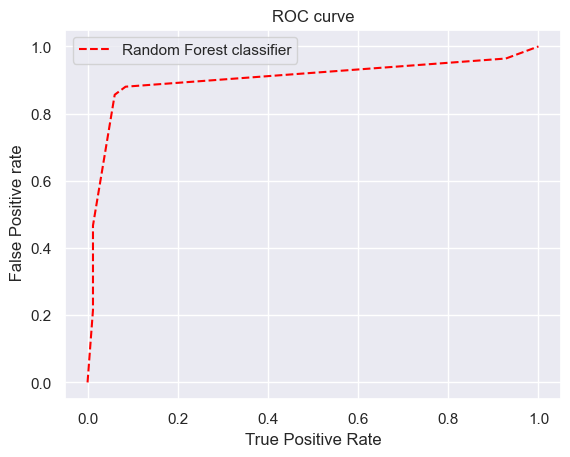

In [340]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(tpr1, fpr1, linestyle='--',color='red', label='Random Forest classifier')

plt.title('ROC curve')
plt.xlabel('True Positive Rate')
plt.ylabel(' False Positive rate')
plt.legend(loc='best')

# saving model

In [341]:
import pickle
filename = 'Global_Power_Plant_Fuel_primary.pkl'
pickle.dump(GCV,open(filename,'wb'))


In [342]:
loaded_model = pickle.load(open('Global_Power_Plant_Fuel_primary.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

88.58023074176009


In [348]:
### Predicting the Output
original = np.array(y_test)
predicted = np.array(loaded_model.predict(x_test))
df_new = pd.DataFrame({"Original":original,"Predicted":predicted},index= range(len(original)))
df_new.sample(20)

,Original,Predicted
165,1,1.833788
176,1,1.350458
40,5,2.669144
216,1,1.190716
54,3,3.021167
114,1,1.475808
9,6,5.975062
182,6,6.010598
152,3,1.473318
228,3,3.126776


Text(0.5, 1.0, 'Original vs predicted  graph')

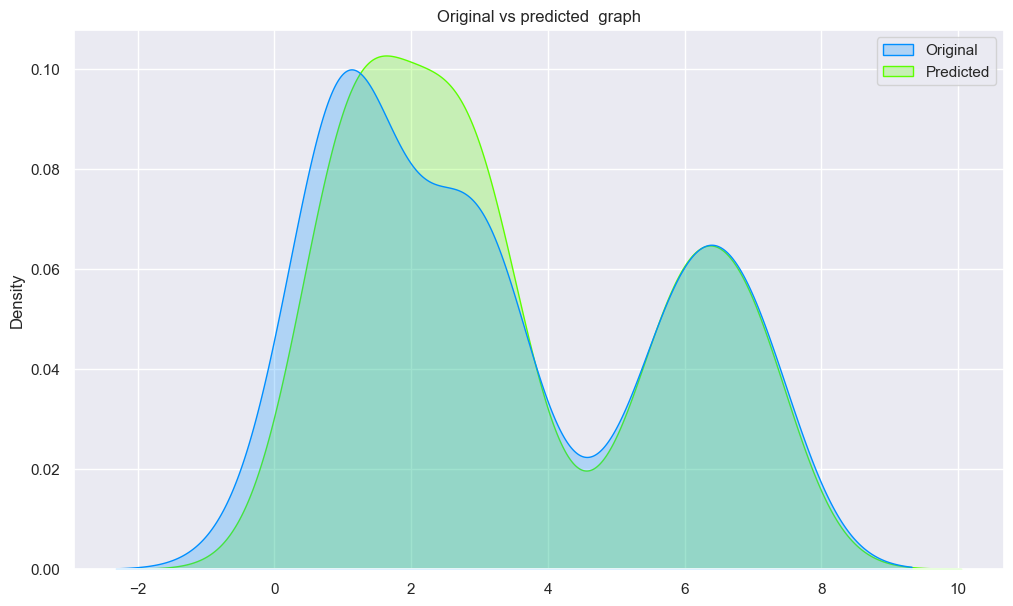

In [349]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

## Concluding Remarks for Classification Model(Primary Fuel Prediction)
- Conclusion: We can see our Classification model has predicted almost same ouputs.
- The prediction accuracies of these models were then checked.
- Also cross-validation was performed to avoid overfitting of models.
- By hyper parameter tuning, best parameters were applied on the best model and we could attain accuracy of 88%
- The prediction results indicated that the best model achieved good prediction accuracy and has given quite accurate results


# (Approach 2: 'Regression Model to find "Capacity_mw")


# Data Preprocessing


# Seperating Input and Target variables

In [350]:
x1=df.drop('capacity_mw', axis=1)
y1=df["capacity_mw"]

In [351]:
x1.shape

(831, 11)

In [352]:
y1.shape

(831,)

# scaling

In [353]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
x1

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.157106,-0.884596,1.170841,1.008609,1.699913,-0.202309,-0.047932,-0.071069,-0.070834,-0.045236,-0.045236
1,0.598481,-0.569695,-0.991312,0.121737,2.589511,0.399723,-0.047932,-0.071069,-0.070834,-0.045236,-0.045236
2,0.130590,-1.774661,1.603271,0.121737,-0.527555,0.399723,-0.047932,-0.071069,-0.070834,-0.045236,-0.045236
3,0.452172,3.285421,-0.558881,0.388108,-0.479963,0.399723,-0.265160,0.069304,0.078803,-0.206411,-0.206411
4,0.139825,1.225417,-0.991312,1.362535,-0.479963,0.399723,1.415491,2.386005,2.387439,2.049696,2.049696
...,...,...,...,...,...,...,...,...,...,...,...
826,-0.786216,0.062682,-0.991312,1.450943,-0.479963,0.399723,-0.047932,-2.197539,-0.824317,0.000204,0.000204
827,-1.342242,0.248773,1.170841,0.121737,1.123119,-2.518523,-0.047932,-0.071069,-0.070834,-0.045236,-0.045236
828,-0.952793,-0.345977,1.603271,0.121737,-0.527555,0.399723,-0.047932,-0.071069,-0.070834,-0.045236,-0.045236
829,0.530434,-0.767915,-0.991312,0.121737,0.724276,0.399723,-0.047932,-0.071069,-0.070834,-0.045236,-0.045236


# Checking VIF Values

In [356]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.906539,capacity_mw
1,1.070378,latitude
2,1.180552,longitude
3,1.113746,commissioning_year
4,1.410911,source
5,1.521094,geolocation_source
6,3.643026,generation_gwh_2014
7,6.564492,generation_gwh_2015
8,5.361078,generation_gwh_2016


# modelling

In [357]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV


In [358]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.25, random_state =i)
    dtr = DecisionTreeRegressor()
    dtr.fit(x1_train, y1_train)
    pred1 = dtr.predict(x1_test)
    acc=r2_score(y1_test, pred1)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8224332757472156  on Random_state  191


In [359]:
# Splitting data into Train-Test
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=maxRS)

# 1. Linear Regression

In [364]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)
pred_lr1=lr.predict(x1_test)
pred_train=lr.predict(x1_train)
print("R2 score on test data ",r2_score(y1_test,pred_lr1)*100)

print("Mean Absolute Error ",mean_absolute_error(y1_test,pred_lr1)*100)
print("Mean Squared Error:",mean_squared_error(y1_test,pred_lr1)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,pred_lr1)*100))

R2 score on test data  56.11597736102315
Mean Absolute Error  150.73678103623217
Mean Squared Error: 396.08197460037206
Root Meand Squared Error: 19.901808324882744


In [365]:
# cv score for Linear Regression 
cvlr=cross_val_score(lr,x1,y1,cv=5).mean()
print('CV score  for Linear rgerssion:',cvlr)
print("And Difference between CV and r2_score =", r2_score(y1_test,pred_lr1)-cvlr)

CV score  for Linear rgerssion: 0.5335248750614202
And Difference between CV and r2_score = 0.027634898548811293


# 2. Support Vector Regressor

In [366]:
svr=SVR()
svr.fit(x1_train,y1_train)
pred_svr1=svr.predict(x1_test)
pred_train=svr.predict(x1_train)
print("R2 score on test data ",r2_score(y1_test,pred_svr1)*100)

print("Mean Absolute Error ",mean_absolute_error(y1_test,pred_svr1)*100)
print("Mean Squared Error:",mean_squared_error(y1_test,pred_svr1)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,pred_svr1)*100))

R2 score on test data  80.44885445070675
Mean Absolute Error  98.15821995365457
Mean Squared Error: 176.46186172516957
Root Meand Squared Error: 13.283894825132032


In [367]:
# cv score for Support Vector Regressor
cvsvr=cross_val_score(svr,x1,y1,cv=5).mean()
print('CV score  for Support Vector Regressor:',cvsvr)
print("And Difference between CV and r2_score =", r2_score(y1_test,pred_svr1)-cvsvr)

CV score  for Support Vector Regressor: 0.7404556579668194
And Difference between CV and r2_score = 0.06403288654024808


# 3. Decision Tree Regressor

In [368]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
pred_dtr1=dtr.predict(x1_test)
pred_train=dtr.predict(x1_train)
print("R2 score on test data ",r2_score(y1_test,pred_dtr1)*100)

print("Mean Absolute Error ",mean_absolute_error(y1_test,pred_dtr1)*100)
print("Mean Squared Error:",mean_squared_error(y1_test,pred_dtr1)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,pred_dtr1)*100))

R2 score on test data  80.98213479357423
Mean Absolute Error  96.10320831165926
Mean Squared Error: 171.6486582283938
Root Meand Squared Error: 13.101475421813904


In [369]:
# cv score for Decision Tree Regressor
cvdtr=cross_val_score(dtr,x1,y1,cv=5).mean()
print('CV score  for Decision Tree Regressor:',cvdtr)
print("And Difference between CV and r2_score =", r2_score(y1_test,pred_dtr1)-cvdtr)

CV score  for Decision Tree Regressor: 0.7002635413929447
And Difference between CV and r2_score = 0.10955780654279768


# 4. K Neighbors Regressor

In [370]:
knn=KNeighborsRegressor()
knn.fit(x1_train,y1_train)
pred_knn1=knn.predict(x1_test)
pred_train=knn.predict(x1_train)
print("R2 score on test data ",r2_score(y1_test,pred_knn1)*100)

print("Mean Absolute Error ",mean_absolute_error(y1_test,pred_knn1)*100)
print("Mean Squared Error:",mean_squared_error(y1_test,pred_knn1)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,pred_knn1)*100))

R2 score on test data  80.10169125425703
Mean Absolute Error  97.50988720609743
Mean Squared Error: 179.59523638158157
Root Meand Squared Error: 13.4013147258611


In [227]:
# cv score for K Neighbors Regressor
cvknn=cross_val_score(knn,x1,y1,cv=5).mean()
print('CV score  for K Neighbors Regressor:',cvknn)
print("And Difference between CV and r2_score =", r2_score(y1_test,pred_knn1)-cvknn)

CV score  for K Neighbors Regressor: 0.6891696947738866
And Difference between CV and r2_score = 0.028655461585809783


# 5.Random Forest Regressor

In [371]:
rfr=RandomForestRegressor()
rfr.fit(x1_train,y1_train)
pred_rfr1=rfr.predict(x1_test)
pred_train=rfr.predict(x1_train)
print("R2 score on test data ",r2_score(y1_test,pred_rfr1)*100)

print("Mean Absolute Error ",mean_absolute_error(y1_test,pred_rfr1)*100)
print("Mean Squared Error:",mean_squared_error(y1_test,pred_rfr1)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,pred_rfr1)*100))

R2 score on test data  90.15885740089676
Mean Absolute Error  68.91298285101229
Mean Squared Error: 88.82274136634449
Root Meand Squared Error: 9.424581760818063


In [372]:
# cv score for Random Forest Regressor
cvrfr=cross_val_score(rfr,x1,y1,cv=5).mean()
print('CV score  for Random Forest Regressor:',cvrfr)
print("And Difference between CV and r2_score =", r2_score(y1_test,pred_rfr1)-cvrfr)

CV score  for Random Forest Regressor: 0.8332138761577121
And Difference between CV and r2_score = 0.0683746978512555


# 6.Ada Boost Regressor

In [373]:
adr=AdaBoostRegressor()
adr.fit(x1_train,y1_train)
pred_adr1=adr.predict(x1_test)
pred_train=adr.predict(x1_train)
print("R2 score on test data ",r2_score(y1_test,pred_adr1)*100)

print("Mean Absolute Error ",mean_absolute_error(y1_test,pred_adr1)*100)
print("Mean Squared Error:",mean_squared_error(y1_test,pred_adr1)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,pred_adr1)*100))

R2 score on test data  75.94243961341029
Mean Absolute Error  124.97337696430195
Mean Squared Error: 217.13519976003522
Root Meand Squared Error: 14.735508126971231


In [374]:
# cv score for Ada Boost Regressor
cvadr=cross_val_score(adr,x1,y1,cv=5).mean()
print('CV score  for Ada Boost Regressor:',cvadr)
print("And Difference between CV and r2_score =", r2_score(y1_test,pred_adr1)-cvadr)

CV score  for Ada Boost Regressor: 0.7356964725856908
And Difference between CV and r2_score = 0.023727923548412022


# 7.Gradient Boosting Regressor

In [375]:
gbr=GradientBoostingRegressor()
gbr.fit(x1_train,y1_train)
pred_gbr1=gbr.predict(x1_test)
pred_train=gbr.predict(x1_train)
print("R2 score on test data ",r2_score(y1_test,pred_gbr1)*100)

print("Mean Absolute Error ",mean_absolute_error(y1_test,pred_gbr1)*100)
print("Mean Squared Error:",mean_squared_error(y1_test,pred_gbr1)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,pred_gbr1)*100))

R2 score on test data  89.83728021193149
Mean Absolute Error  71.65900248757514
Mean Squared Error: 91.72518558937416
Root Meand Squared Error: 9.577326641050423


In [376]:
# cv score for Gradient Boosting Regressor
cvgbr=cross_val_score(gbr,x1,y1,cv=5).mean()
print('CV score  for Gradient Boosting Regressor:',cvgbr)
print("And Difference between CV and r2_score =", r2_score(y1_test,pred_gbr1)-cvgbr)

CV score  for Gradient Boosting Regressor: 0.8276951170379018
And Difference between CV and r2_score = 0.07067768508141314


# 8. Lasso Regression

In [235]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [377]:
ls=Lasso(alpha=0.1)
ls.fit(x1_train,y1_train)
pred_ls1=ls.predict(x1_test)
pred_train=ls.predict(x1_train)
print("R2 score on test data ",r2_score(y1_test,pred_ls1)*100)

print("Mean Absolute Error ",mean_absolute_error(y1_test,pred_ls1)*100)
print("Mean Squared Error:",mean_squared_error(y1_test,pred_ls1)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,pred_ls1)*100))

R2 score on test data  57.40340593101434
Mean Absolute Error  152.78847546719575
Mean Squared Error: 384.46209065413296
Root Meand Squared Error: 19.607704879820407


In [378]:
# cv score for Lasso Regression
cvls=cross_val_score(ls,x1,y1,cv=5).mean()
print('CV score  for Lasso Regression:',cvls)
print("And Difference between CV and r2_score =", r2_score(y1_test,pred_ls1)-cvls)

CV score  for Lasso Regression: 0.5301758649645885
And Difference between CV and r2_score = 0.043858194345554935


# 9. Ridge Regression

In [379]:
rg=Ridge(alpha=0.1)
rg.fit(x1_train,y1_train)
pred_rg1=rg.predict(x1_test)
pred_train=rg.predict(x1_train)
print("R2 score on test data ",r2_score(y1_test,pred_rg1)*100)

print("Mean Absolute Error ",mean_absolute_error(y1_test,pred_rg1)*100)
print("Mean Squared Error:",mean_squared_error(y1_test,pred_rg1)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,pred_rg1)*100))

R2 score on test data  56.12320269116036
Mean Absolute Error  150.73387971530272
Mean Squared Error: 396.0167612754354
Root Meand Squared Error: 19.900169880567237


In [380]:
# cv score forRidge Regression
cvrg=cross_val_score(rg,x1,y1,cv=5).mean()
print('CV score  for Ridge Regression:',cvrg)
print("And Difference between CV and r2_score =", r2_score(y1_test,pred_rg1)-cvrg)

CV score  for Ridge Regression: 0.5335419219970456
And Difference between CV and r2_score = 0.027690104914557923


# We can see the difference between r2_score and cv score is least in Random Forest Regressor and Gradient Boosting regressor, so we will perform hyper tuning on both the algos and will select best from them then.

# Hyper Parameter Tuning

# 1. On Random Forest Regressor 


In [383]:
rfr.get_params() # Getting Random Forest Regressor Parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [384]:
#Selecting few parameter list to pass in Random Forest Regressor
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'max_features':['sqrt', 'log2', None], 
             'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
             'max_depth':[2,3,4],
             'n_estimators':[10,100,150,200]}

In [385]:
# Start Tuning 
rfr1=RandomForestRegressor()
GCV = GridSearchCV(rfr1,parameter,cv=4)

GCV.fit(x1_train,y1_train)  
print(GCV.best_params_)

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 10}


In [387]:
#Applying best parameter values on Random Forest Regressor Algorithm 
capacity_best=RandomForestRegressor(criterion= 'squared_error', max_depth= 4, max_features= 'log2', n_estimators= 10)
capacity_best.fit(x1_train,y1_train)
capacity_best.score(x1_train,y1_train)

0.8257747938906312

In [389]:
predrfr1=capacity_best.predict(x1_test)
print("r2_score=",r2_score(y1_test,predrfr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predrfr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predrfr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predrfr1)))

r2_score= 0.8502396411897202 

Mean Absolute Error: 0.8706902795002995
Mean Squared Error: 1.351685079611445
Root Meand Squared Error: 1.1626199205292522


# 2. On Gradient Boosting Regressor


In [390]:
#Selecting few parameter list to pass in Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
             'max_features':['sqrt', 'log2', 'auto'], 
             'criterion':['squared_error', 'friedman_mse'],
             'max_depth':[2,3,4],
             'n_estimators':[10,100,150,200]}

In [391]:
# Start Tuning 
gbr1=GradientBoostingRegressor()
GCV = GridSearchCV(gbr1,parameter,cv=4)

GCV.fit(x1_train,y1_train)  
print(GCV.best_params_) 

{'criterion': 'squared_error', 'loss': 'huber', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}


In [392]:
#Applying best parameter values on Gradient Boosting Regressor Algorithm 
capacity_best2=GradientBoostingRegressor(criterion= 'squared_error', loss= 'huber', max_depth=4, max_features='log2', n_estimators= 200)
capacity_best2.fit(x1_train,y1_train)
capacity_best2.score(x1_train,y1_train)

0.9619241249178384

In [393]:
predgbr1=capacity_best2.predict(x1_test)
print("r2_score=",r2_score(y1_test,predgbr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predgbr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predgbr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predgbr1)))

r2_score= 0.9081094861800582 

Mean Absolute Error: 0.6709013045961807
Mean Squared Error: 0.8293719210808865
Root Meand Squared Error: 0.9106985895898195


## Observing the final r2_scores of both the algos, we can say Gradient Boosting Regressor has given better score, so selecting that as best regressor model

In [251]:
# Saving the best Regressor model
import joblib

joblib.dump(capacity_best2,'capacity.obj')
capacity_model=joblib.load('capacity.obj')

In [398]:
### Predicting the Output
original = np.array(y1_test)
predicted = np.array(capacity_model.predict(x1_test))
df_new1 = pd.DataFrame({"Original":original,"Predicted":predicted},index= range(len(original)))
df_new1.sample(20)

,Original,Predicted
49,10.626586,1.987534
177,9.435388,1.444067
74,3.301927,3.061077
138,1.817121,2.868742
31,6.481605,2.426757
154,4.932424,2.645302
195,2.620741,2.942772
180,10.131594,2.526767
161,2.714418,2.009938
131,6.214465,1.747528


- As we can see Our best model predict aprrox same output

Text(0.5, 1.0, 'Original vs predicted  graph')

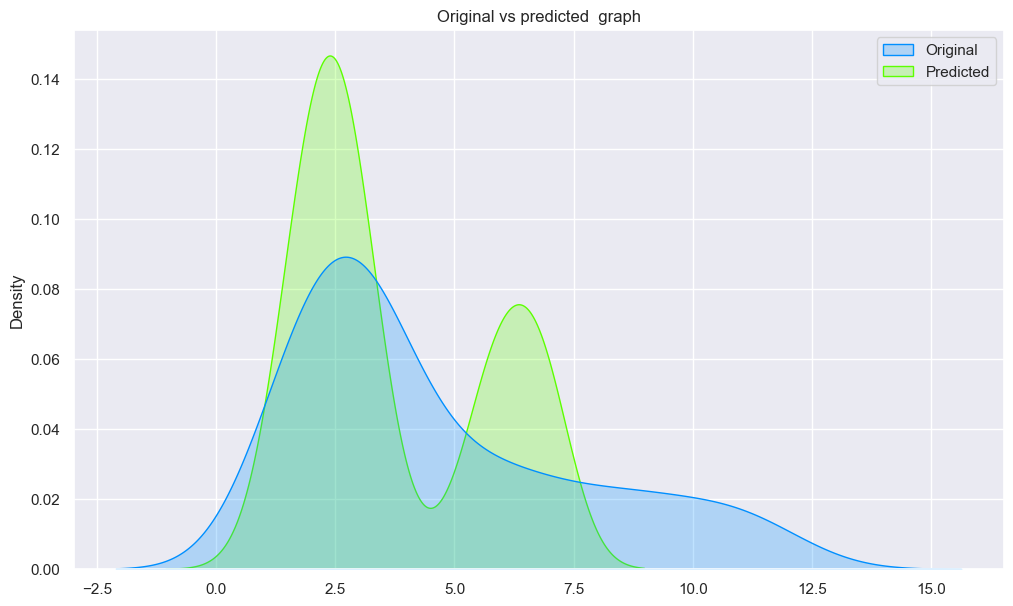

In [399]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new1, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

# Concluding Remarks for Regression Model(Capacity_mw Prediction)

- The prediction scores of these models were then checked.
- Also cross-validation was performed to avoid overfitting of models.
- By hyper parameter tuning, best parameters were applied on both Random Forest Regressor and Gradient Boosting Regressor, and Gradient Boosting Regressor was selected as the best model and we could attain r2_score of 90%
- The prediction results indicated that the best model achieved good prediction accuracy and has given quite accurate results